In [14]:
# Import necessary libraries
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns  # Corrected import name

# Load the Wine dataset from scikit-learn
wine_data = load_wine()

# Extract features (X) and targets (y)
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target, name='target')

# Print metadata about the dataset
print(wine_data.DESCR)

# Print information about the features (X)
print(X.info())

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [2]:
# Combine features (X) and targets (y) into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the last few rows of the DataFrame to check the combination
df.tail()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [3]:
# Check for null values in the DataFrame
null_values = df.isna().sum()

# Print the number of null values for each column
print("Number of null values per column:\n", null_values)


Number of null values per column:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


## Descriptive Figures

In [4]:
# Create a DataFrame to store average scores for each variable by class
class_averages = df.groupby('target').mean()
class_averages.reset_index(inplace=True)

# Define a mapping of current values to new values for better readability
value_mapping = {0: 'Cultivar 1', 1: 'Cultivar 2', 2: 'Cultivar 3'}

# Replace the numerical target values with descriptive names using the mapping
class_averages['target'] = class_averages['target'].map(value_mapping)

# Display the first few rows of the modified DataFrame
class_averages.head()


,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,Cultivar 1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,Cultivar 2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,Cultivar 3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


## Descriptive Figures shopwing average amount of indicated variable by cultivar

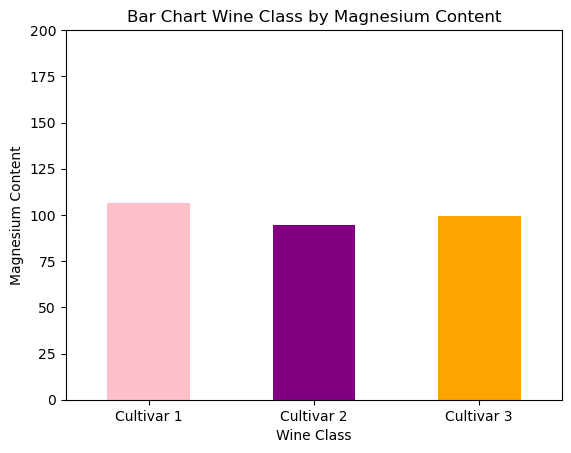

In [5]:
# Descriptive figure showing avg. magnesium content of each cultivar
# Define colors for bars
colors = ['pink', 'purple', 'orange']

# Plot the bar chart for Class by Magnesium content
class_averages.plot(x='target', y='magnesium', kind='bar', color=colors, legend=None)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Magnesium Content')
plt.title('Bar Chart Wine Class by Magnesium Content')
plt.ylim(0, 200)  # Adjust the y-axis limits as needed
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()


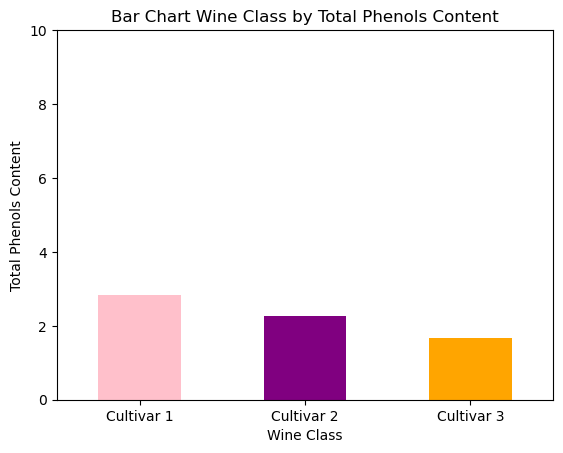

In [6]:
# Descriptive figure showing avg. phenol content of each cultivar
# Define colors for bars
colors = ['pink', 'purple', 'orange']

# Plot the bar chart for Class by Total Phenols content
class_averages.plot(x='target', y='total_phenols', kind='bar', color=colors, legend=None)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Total Phenols Content')
plt.title('Bar Chart Wine Class by Total Phenols Content')
plt.ylim(0, 10)  # Adjust the y-axis limits as needed
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()


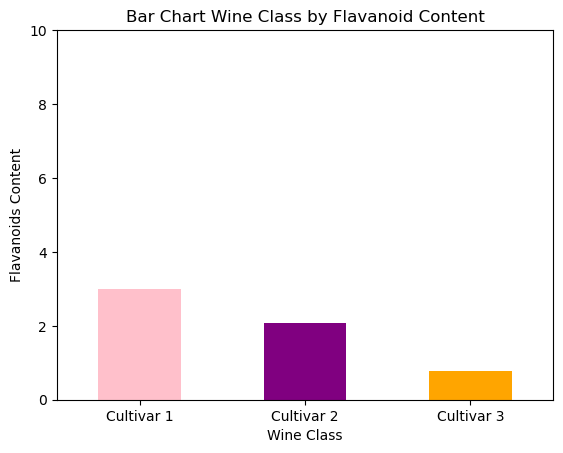

In [7]:
# Descriptive figure showing avg. flavanoid content of each cultivar
colors = ['pink', 'purple', 'orange']

# Plot the bar chart for Class by Flavanoids content
class_averages.plot(x='target', y='flavanoids', kind='bar', color=colors, legend=None)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Flavanoids Content')
plt.title('Bar Chart Wine Class by Flavanoid Content')
plt.ylim(0, 10)  # Adjust the y-axis limits as needed
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()


## Testing and Training the Model

In [8]:
# Separate features (X) and target (y) variables
x = df.copy()  # Make a copy of the DataFrame
y = x.pop("target")  # Remove the 'target' column from x and assign it to y

# Extract the unique values from the "target" column
unique_classes = y.unique()

# Print the number of unique classes and their names
print(f"We have {len(unique_classes)} different unique classes of wine:", unique_classes)


We have 3 different unique classes of wine: [0 1 2]


In [9]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and random_state=55 ensures reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=55)

# Print the shapes of the training and testing sets to verify the split
print("Training data - Features shape:", X_train.shape)
print("Testing data - Features shape:", X_test.shape)
print("Training data - Target shape:", Y_train.shape)
print("Testing data - Target shape:", Y_test.shape)

Training data - Features shape: (142, 13)
Testing data - Features shape: (36, 13)
Training data - Target shape: (142,)
Testing data - Target shape: (36,)


In [10]:
# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier using the training data
knn.fit(X_train, Y_train)

# At this point, the model (knn) has been trained on the training data

KNeighborsClassifier()

In [11]:
# Check the accuracy of the trained model using the test data
accuracy_1 = knn.score(X_test, Y_test)

# Print the accuracy score
print(f"The accuracy of the model on the test data is: {accuracy_1:.2f}")


The accuracy of the model on the test data is: 0.64


## Finding the optimaL n_neighbors quantity

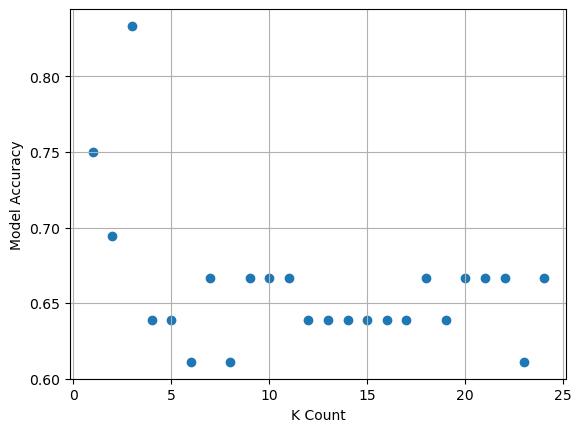

The most accurate K count to use is: 3


In [15]:
# Define a range of k values to test
k_range = range(1, 25)
scores = []

# Test different values of k and collect accuracy scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

# Plot the accuracy scores for different k values
plt.figure()
plt.xlabel("K Count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, scores)
plt.grid()
plt.xticks(np.arange(0, 26, step=5))  # Set x-axis ticks at intervals of 5
plt.show()

# Find the most accurate k value
best_k = np.argmax(scores) + 1  # Add 1 to get the actual k value since indexing starts at 0
print(f"The most accurate K count to use is: {best_k}")

## Changing K count on model to increase accuracy

In [16]:
# Create a KNN classifier with k=3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier using the training data
knn.fit(X_train, Y_train)

# Check the accuracy of the trained model using the test data
accuracy_1 = knn.score(X_test, Y_test)

# Print the accuracy score
print(f"The accuracy of the model on the test data is: {accuracy_1:.2f}")

The accuracy of the model on the test data is: 0.83


## Make Predictions

In [18]:
# Create predictions using the trained KNN model on the test data
predictions = knn.predict(X_test)

# Now, the 'predictions' variable contains the predicted classes for the test data

# Display an array of the predicted wine origins
print(predictions)

[0 2 1 2 1 2 0 1 0 1 0 2 2 0 1 2 0 0 2 0 1 2 0 1 1 1 1 2 1 1 0 1 1 1 2 2]


In [19]:
# Create a DataFrame to display actual and predicted wine origins side by side
results_df = pd.DataFrame({'Actual': Y_test.values, 'Predicted': predictions})

# Print the DataFrame to see the actual and predicted values together
print(results_df)

    Actual  Predicted
0        0          0
1        2          2
2        1          1
3        2          2
4        2          1
5        1          2
6        0          0
7        1          1
8        0          0
9        2          1
10       2          0
11       2          2
12       1          2
13       0          0
14       1          1
15       2          2
16       0          0
17       0          0
18       2          2
19       0          0
20       1          1
21       2          2
22       2          0
23       1          1
24       1          1
25       1          1
26       1          1
27       2          2
28       1          1
29       1          1
30       0          0
31       1          1
32       1          1
33       1          1
34       2          2
35       2          2


In [23]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 8  0  0]
 [ 0 13  2]
 [ 2  2  9]]


In [25]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Print confusion matrix with labels and improved formatting
print("Confusion Matrix:")
print("------------------------")
print("              Predicted")
print("              0    |    1")
print("------------------------")
print(f"Actual 0     {cm[0][0]:<5} | {cm[0][1]:<5}")
print(f"       1     {cm[1][0]:<5} | {cm[1][1]:<5}")
print("------------------------")

# Calculate accuracy
accuracy = (cm[0][0] + cm[1][1]) / sum(sum(cm))
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
------------------------
              Predicted
              0    |    1
------------------------
Actual 0     8     | 0    
       1     0     | 13   
------------------------

Accuracy: 0.58
